In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\Gagan\Downloads/spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.shape

(5572, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.dtypes

Category    object
Message     object
dtype: object

In [6]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


<AxesSubplot:>

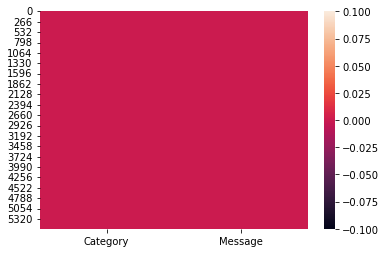

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [11]:
for i in df.columns:
    print(df[i].value_counts())

ham     4825
spam     747
Name: Category, dtype: int64
Sorry, I'll call later                                                                                                                                      30
I cant pick the phone right now. Pls send a message                                                                                                         12
Ok...                                                                                                                                                       10
Ok                                                                                                                                                           4
Ok.                                                                                                                                                          4
                                                                                                                                                      

# the dataset contain 5572 rows × 2 columns check the data types and data type is object data type check the null values and drawn the heatrmap and no null values present in the dataset Also we can see that there is class imbalanced problem so we need to solve that also

# LETS DRAW THE GRAPH AND OBSERVE THROUGH THE GRAPH

<AxesSubplot:xlabel='Category', ylabel='count'>

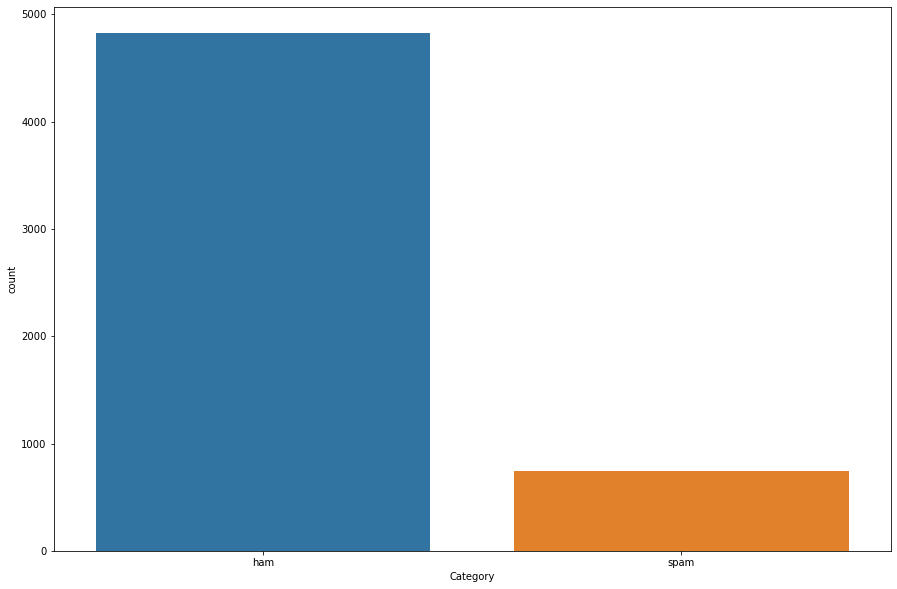

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(x='Category',data=df)

# Clearly we can see that ther is a huge class difference and also we mention it earlier

<AxesSubplot:xlabel='Message', ylabel='Count'>

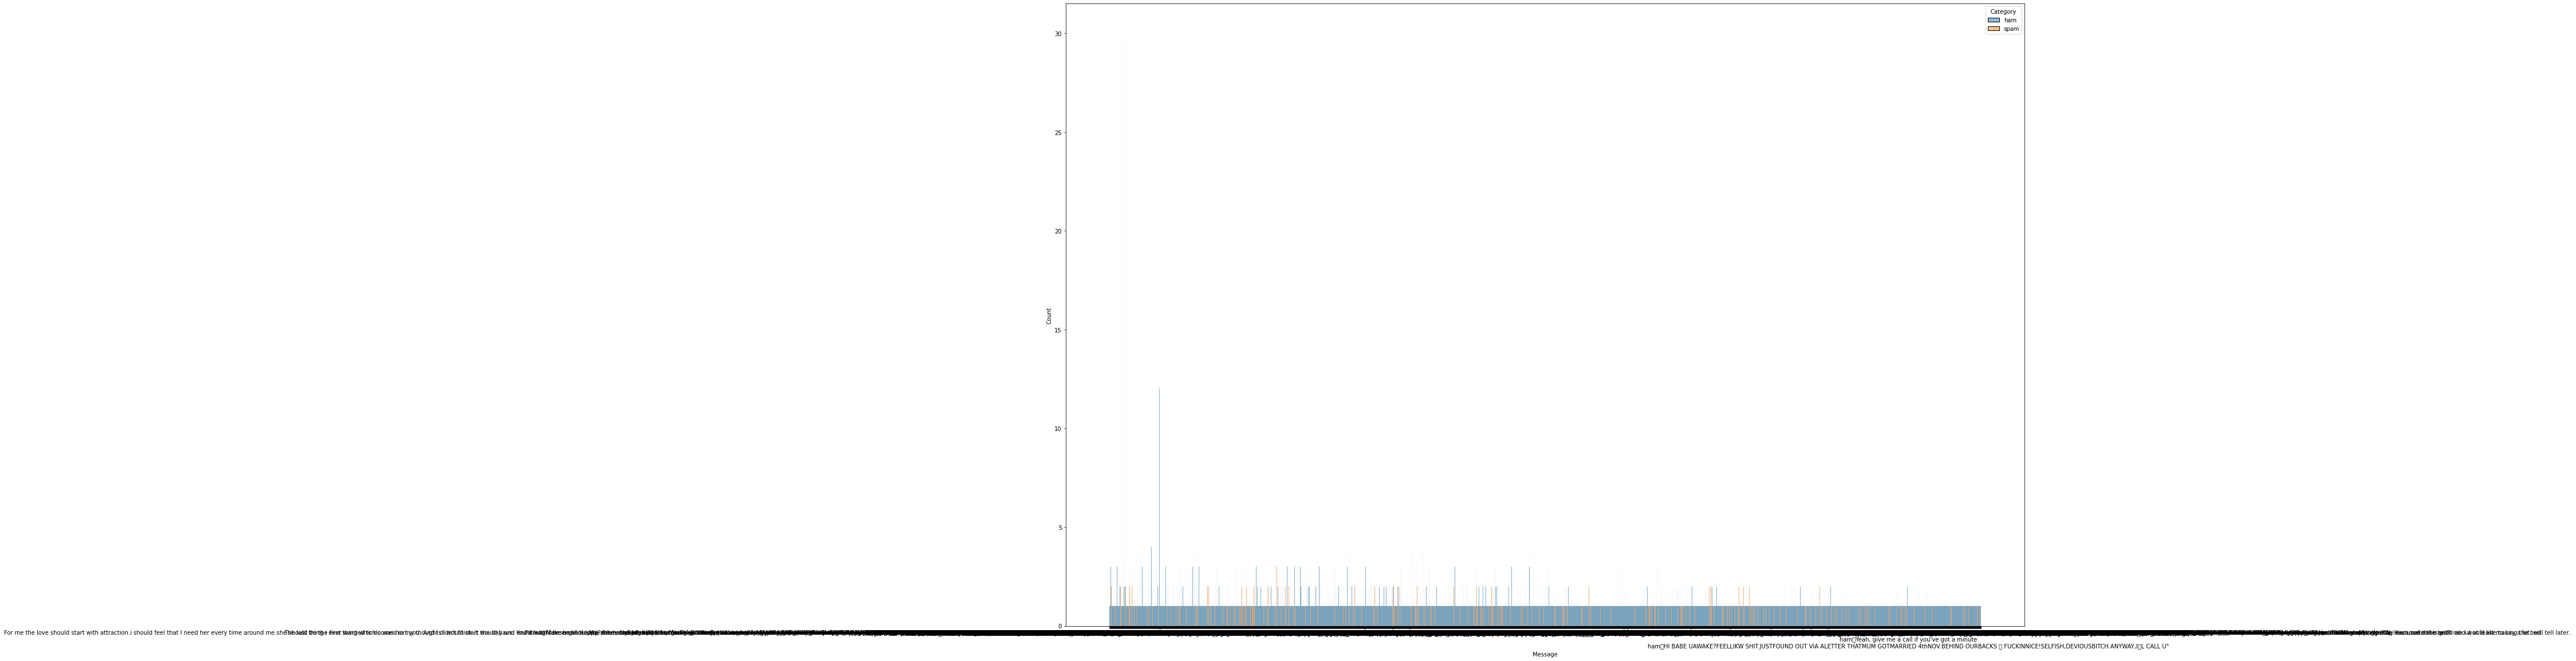

In [18]:
plt.figure(figsize=(30,20))
sns.histplot(x='Message',hue='Category',data=df)

# Now we will convert the text data into numeric form and solve the problem of class difference also

In [19]:
df['Category'] = df['Category'].replace({'ham':0,'spam':1})

In [20]:
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [21]:
from category_encoders import BinaryEncoder

In [24]:
BE=BinaryEncoder()
df=BE.fit_transform(df,drop_first=True)
df

,Category,Message_0,Message_1,Message_2,Message_3,Message_4,Message_5,Message_6,Message_7,Message_8,Message_9,Message_10,Message_11,Message_12
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,1,1,0,1,0,0,0,0,1,0,0,0,0,1
5568,0,1,0,1,0,0,0,0,1,0,0,0,1,0
5569,0,1,0,1,0,0,0,0,1,0,0,0,1,1
5570,0,1,0,1,0,0,0,0,1,0,0,1,0,0


# Now lets solve the prob of class difference

In [25]:
X=df.drop('Category',axis=1)
Y=df['Category']

In [26]:
Y.shape

(5572,)

In [28]:
Y.value_counts()

0    4825
1     747
Name: Category, dtype: int64

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
sm=SMOTE()
X,Y=sm.fit_resample(X,Y)

In [31]:
Y.value_counts()

0    4825
1    4825
Name: Category, dtype: int64

In [33]:
X.shape,Y.shape

((9650, 13), (9650,))

# Now class imbalanced is solved and lets move towards the model building

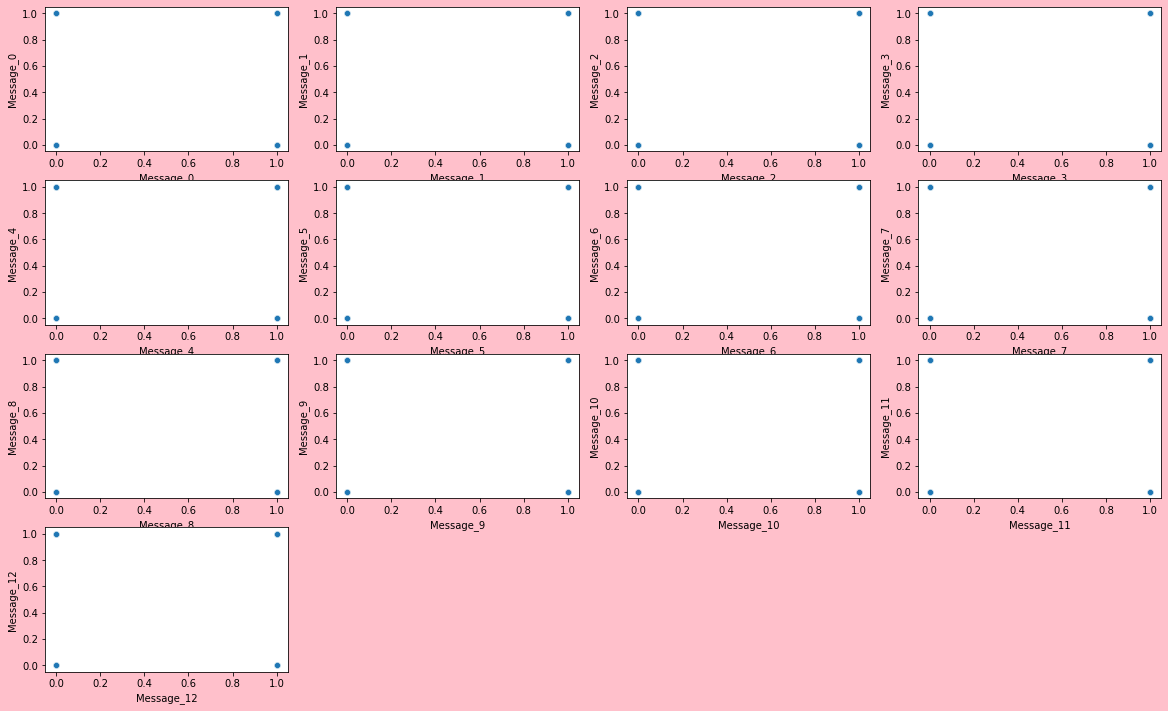

In [34]:
plt.figure(figsize=(20,25),facecolor='pink')
plotnumber=1
for columns in X.columns:
    if plotnumber<=32:
        ax=plt.subplot(8,4,plotnumber)
        sns.scatterplot(Y,X[columns])
        plt.xlabel(columns,fontsize=10)
    plotnumber+=1
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [37]:
scaller=StandardScaler()
X_scaled=scaller.fit_transform(X)

In [38]:
data=df.corr()
data

,Category,Message_0,Message_1,Message_2,Message_3,Message_4,Message_5,Message_6,Message_7,Message_8,Message_9,Message_10,Message_11,Message_12
Category,1.000000,-0.033027,-0.019811,0.010191,0.010224,-0.026550,0.000409,-0.006771,-0.010691,-0.002069,0.005653,0.006512,0.010237,0.002710
Message_0,-0.033027,1.000000,-0.385850,-0.366269,-0.001360,-0.013622,-0.011311,-0.016810,-0.002905,-0.002031,-0.003818,0.004415,0.003294,-0.000420
Message_1,-0.019811,-0.385850,1.000000,0.145891,0.012917,0.010018,0.013763,0.003377,0.002298,-0.002185,0.003774,0.006044,0.002752,0.000426
Message_2,0.010191,-0.366269,0.145891,1.000000,0.000168,-0.002583,-0.000582,-0.013367,-0.012005,-0.004306,0.002997,-0.003239,0.008916,-0.000930
Message_3,0.010224,-0.001360,0.012917,0.000168,1.000000,0.014534,0.008998,-0.001171,0.007608,-0.003997,0.000730,0.008026,0.009415,0.004575
Message_4,-0.026550,-0.013622,0.010018,-0.002583,0.014534,1.000000,0.011313,-0.001125,0.013491,-0.002537,0.009340,0.008854,0.000214,-0.003279
Message_5,0.000409,-0.011311,0.013763,-0.000582,0.008998,0.011313,1.000000,0.011816,0.010676,0.000344,0.004311,0.007464,0.015346,-0.001107
Message_6,-0.006771,-0.016810,0.003377,-0.013367,-0.001171,-0.001125,0.011816,1.000000,-0.004692,0.011482,-0.009690,-0.000021,-0.007204,0.003581
Message_7,-0.010691,-0.002905,0.002298,-0.012005,0.007608,0.013491,0.010676,-0.004692,1.000000,-0.005397,0.007182,0.010345,0.000282,-0.006846
Message_8,-0.002069,-0.002031,-0.002185,-0.004306,-0.003997,-0.002537,0.000344,0.011482,-0.005397,1.000000,-0.005384,-0.007189,0.002141,0.002867


<AxesSubplot:>

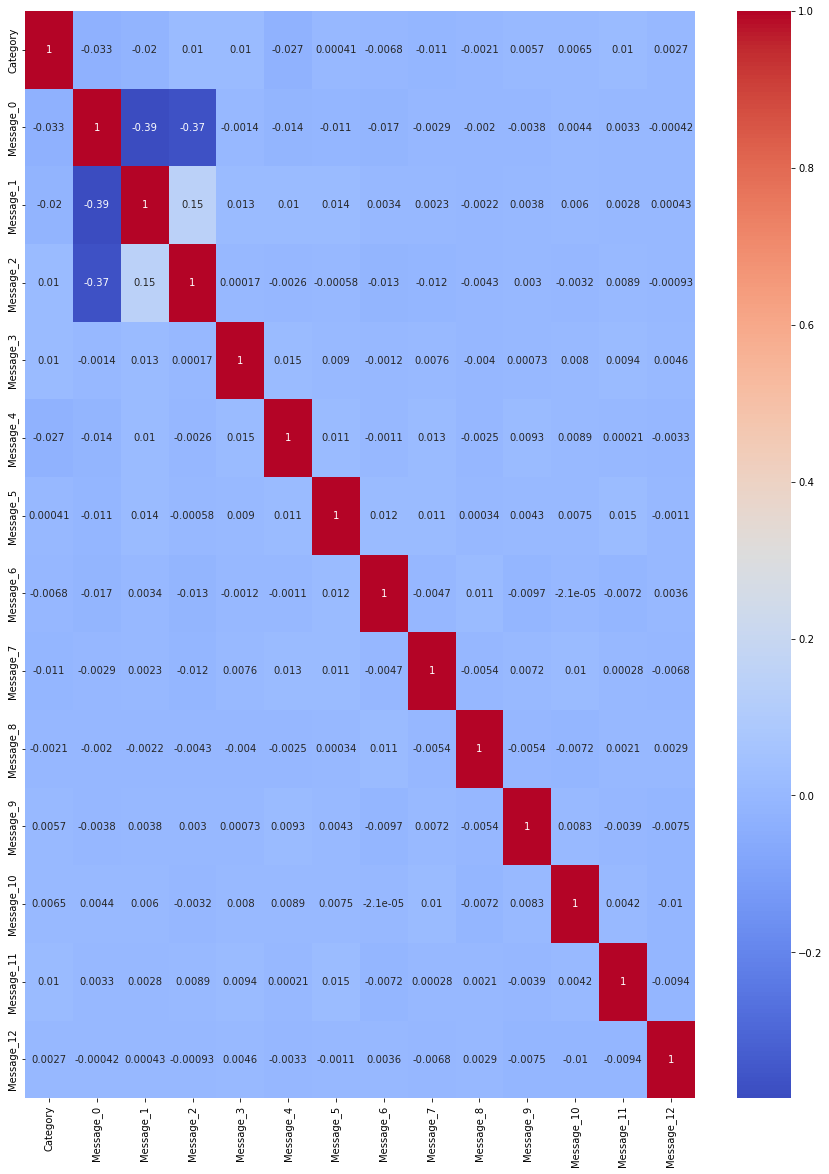

In [39]:
plt.figure(figsize=(15,20))
sns.heatmap(data,annot=True,cmap='coolwarm')

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=67, test_size=.25)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (7237, 13)
Training target vector size: (7237,)
Test feature matrix size: (2413, 13)
Test target vector size: (2413,)


In [41]:
maxAccu=0
maxRS=0
for i in range(50,300):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.6397236614853196 on Random_state 245


In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=245, test_size=0.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.6397236614853196


Confusion matrix of Logistics Regression : 
 [[916 523]
 [520 936]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.64      0.64      0.64      1439
           1       0.64      0.64      0.64      1456

    accuracy                           0.64      2895
   macro avg       0.64      0.64      0.64      2895
weighted avg       0.64      0.64      0.64      2895



In [ ]:
according to confusion matrix
accuracy is 0.63
when its 0 that means B then support is 1439 and when 1 that means M then support is 1456

In [43]:
CVscore = cross_val_score(log_reg, X_scaled, Y, cv =3)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.29654958 0.42834939 0.42661692]
Mean CV Score : 0.38383862987415013
Std deviation : 0.06172673108101143


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [45]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)
print('\033[1m'+'K Neighbors Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of KNeighborsClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

K Neighbors Classifier


Accuracy Score of KNeighborsClassifier : 0.7675302245250432


Confusion matrix of Logistics Regression : 
 [[ 980  459]
 [ 214 1242]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.82      0.68      0.74      1439
           1       0.73      0.85      0.79      1456

    accuracy                           0.77      2895
   macro avg       0.78      0.77      0.77      2895
weighted avg       0.78      0.77      0.77      2895



In [46]:
CVscore = cross_val_score(knn, X_scaled, Y, cv =3)
print('\033[1m'+'Cross Validation Score', knn, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score KNeighborsClassifier() :

CVScore : [0.48834318 0.53372707 0.51150498]
Mean CV Score : 0.5111917423039193
Std deviation : 0.01852922262200377


In [47]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.8186528497409327


Confusion matrix of Decision Tree Classifier : 
 [[1084  355]
 [ 170 1286]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.86      0.75      0.81      1439
           1       0.78      0.88      0.83      1456

    accuracy                           0.82      2895
   macro avg       0.82      0.82      0.82      2895
weighted avg       0.82      0.82      0.82      2895



In [48]:
CVscore = cross_val_score(dtc, X_scaled, Y, cv =3)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.61796705 0.60801989 0.54011194]
Mean CV Score : 0.5886996282188685
Std deviation : 0.03459584791936409


In [49]:
rfr=RandomForestClassifier()
rfr.fit(X_train,Y_train)
y_pred=rfr.predict(X_test)
print('\033[1m'+'Random Forest Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report ofRandom Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier Evaluation


Accuracy Score of Random Forest Classifier : 0.8915371329879102


Confusion matrix of Random Forest Classifier : 
 [[1271  168]
 [ 146 1310]]


classification Report ofRandom Forest Classifier 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1439
           1       0.89      0.90      0.89      1456

    accuracy                           0.89      2895
   macro avg       0.89      0.89      0.89      2895
weighted avg       0.89      0.89      0.89      2895



In [50]:
CVscore = cross_val_score(rfr, X_scaled, Y, cv =3)
print('\033[1m'+'Cross Validation Score', rfr, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.53465962 0.5741374  0.54291045]
Mean CV Score : 0.5505691545381578
Std deviation : 0.01700226472196986


# Now lets do hyper parameter tunning and see whether we will be able to increase score or not

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
grid_param= {
    'criterion' : ['ginny','entropy'],
    'max_depth' : range(5,10),
    'min_samples_leaf': range(3,6),
    'min_samples_split': range(3,8),
    'max_leaf_nodes':range(4,10)
}

In [53]:
grid_search=GridSearchCV(estimator=dtc,
                         param_grid=grid_param,
                        cv=5,n_jobs=-1)

In [54]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginny', 'entropy'],
                         'max_depth': range(5, 10),
                         'max_leaf_nodes': range(4, 10),
                         'min_samples_leaf': range(3, 6),
                         'min_samples_split': range(3, 8)})

In [55]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [63]:
clf=DecisionTreeClassifier(criterion = 'entropy', max_depth= 6, min_samples_leaf= 3, min_samples_split= 8,max_leaf_nodes= 7 )
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=7,
                       min_samples_leaf=3, min_samples_split=8)

In [64]:
y_pred=clf.predict(X_test)

In [65]:
acc_score=accuracy_score(Y_test,y_pred)
acc_score

0.5875647668393782

In [66]:
class_rep=classification_report(Y_test, y_pred)
print(class_rep)
print('\n')

              precision    recall  f1-score   support

           0       0.58      0.64      0.61      1439
           1       0.60      0.53      0.57      1456

    accuracy                           0.59      2895
   macro avg       0.59      0.59      0.59      2895
weighted avg       0.59      0.59      0.59      2895





# Score is not improving so lets try random forest classifier

In [67]:
grid_search=GridSearchCV(estimator=rfr,
                         param_grid=grid_param,
                        cv=5,n_jobs=-1)

In [68]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginny', 'entropy'],
                         'max_depth': range(5, 10),
                         'max_leaf_nodes': range(4, 10),
                         'min_samples_leaf': range(3, 6),
                         'min_samples_split': range(3, 8)})

In [69]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 6}

In [71]:
clf=RandomForestClassifier(criterion = 'entropy', max_depth= 9, min_samples_leaf= 5, min_samples_split= 6,max_leaf_nodes= 9 )
clf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=9,
                       min_samples_leaf=5, min_samples_split=6)

In [72]:
y_pred=clf.predict(X_test)

In [73]:
acc_score=accuracy_score(Y_test,y_pred)
acc_score

0.6490500863557859

In [74]:
class_rep=classification_report(Y_test, y_pred)
print(class_rep)
print('\n')

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      1439
           1       0.65      0.64      0.65      1456

    accuracy                           0.65      2895
   macro avg       0.65      0.65      0.65      2895
weighted avg       0.65      0.65      0.65      2895





# IN RANDOM FOREST CLASSIFIER WE CAN SAY THAT THROUGH HYPER PARAMETER TUNNING SCORE DOESNOT INCREASES